In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
from numpy.linalg import matrix_power
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
n_images = 250
my_number = 10
images = []

while len(images) != n_images:
    idx = random.randint(7, 25000)
    image_name = f'im{idx}.jpg'
    image = cv2.imread(glob.glob(f'./mirflickr/{image_name}')[0])[:, :, 1]
    images.append(image)
    
images = np.asarray(images)
assert len(images) == n_images

# Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

In [3]:
def pca_compres(image, components = None, inverse = True):
    pca = PCA(n_components=components, svd_solver='full')
    res = pca.fit_transform(image)
    if inverse:
        return pca.inverse_transform(res)
    return pca, res

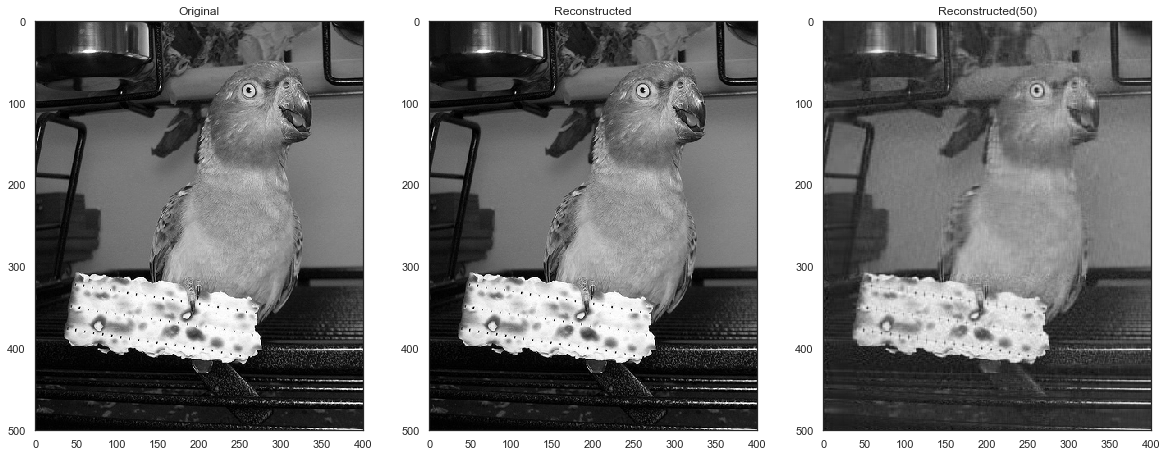

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Original')
plt.imshow(images[0], cmap='gray')

plt.subplot(132)
plt.title('Reconstructed')
plt.imshow(pca_compres(images[0]), cmap='gray')

plt.subplot(133)
plt.title('Reconstructed(50)')
plt.imshow(pca_compres(images[0], components=50), cmap='gray');

# Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

In [5]:
pca, compressed = pca_compres(images[0], inverse = False)
pca.singular_values_

array([20116.36646781, 11461.12719249,  7332.27349316,  5409.22238822,
        4379.8580628 ,  3435.10639174,  3413.44456131,  2937.10469925,
        2805.3328222 ,  2355.40212823,  2317.7648169 ,  2056.22268614,
        1901.29849416,  1828.54046266,  1595.20593894,  1554.22361876,
        1510.37629803,  1453.10511747,  1356.38845932,  1298.98089997,
        1268.82389518,  1197.01988364,  1159.00333136,  1121.70781204,
        1097.31686103,  1055.98278594,  1037.08482895,   999.64249523,
         975.32053944,   934.87376868,   924.94736841,   892.00599454,
         880.39623559,   854.80801658,   838.59986896,   808.59003258,
         789.56815311,   782.95523883,   763.64479491,   744.05440727,
         735.4415227 ,   723.66855565,   711.9347721 ,   693.87135934,
         685.39147568,   678.01996042,   656.36635898,   643.38994771,
         636.88482158,   633.14225191,   624.1490508 ,   611.63435701,
         606.12357187,   594.98576326,   589.36794395,   579.88039563,
      

image shape:  (500, 401)
MSE 10% components 40:  120.08411019862531
MSE 20% components 80:  56.23510114478946
MSE 30% components 120:  29.178266010034
MSE 40% components 160:  15.066391456370722
MSE 50% components 200:  7.445363491115263
MSE 60% components 240:  3.3574252859615483
MSE 70% components 280:  1.2977337746062472
MSE 80% components 320:  0.40567030234424006
MSE 90% components 360:  0.08477772288602937
MSE 100% components 401:  6.569768101956542e-26


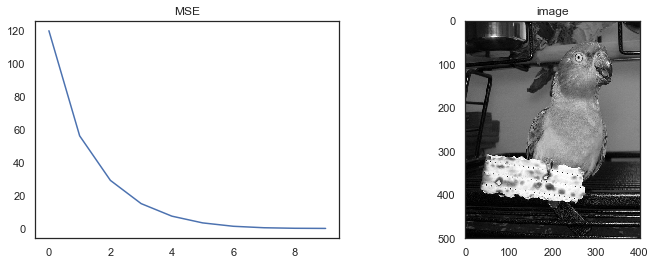

image shape:  (375, 500)
MSE 10% components 37:  39.532177047712494
MSE 20% components 75:  18.001097017379767
MSE 30% components 112:  8.758702251167586
MSE 40% components 150:  3.8850805353797107
MSE 50% components 187:  1.6270684786556449
MSE 60% components 225:  0.635454575239228
MSE 70% components 262:  0.23676720951059668
MSE 80% components 300:  0.0745014324244421
MSE 90% components 337:  0.014729171051493318
MSE 100% components 375:  2.8298542698496554e-26


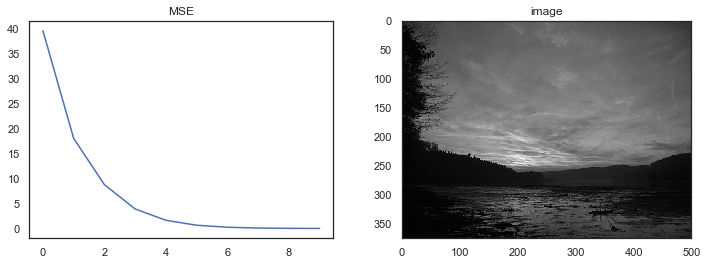

image shape:  (333, 500)
MSE 10% components 33:  366.99167155058063
MSE 20% components 66:  179.31883109387124
MSE 30% components 99:  98.77658593968043
MSE 40% components 133:  52.982687771037696
MSE 50% components 166:  27.16813191525134
MSE 60% components 199:  12.350293043563095
MSE 70% components 233:  4.53957047942731
MSE 80% components 266:  1.3924633087102356
MSE 90% components 299:  0.28199684419310894
MSE 100% components 333:  5.479810283641676e-26


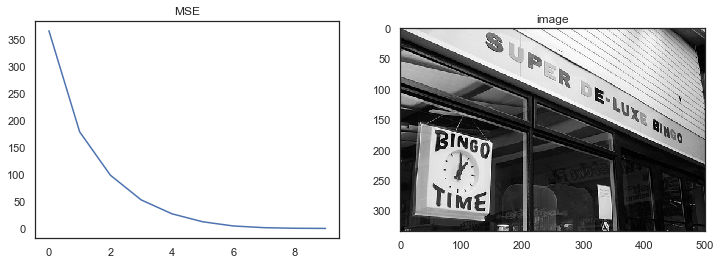

image shape:  (360, 480)
MSE 10% components 36:  115.1406987841598
MSE 20% components 72:  57.401070221647494
MSE 30% components 108:  31.20277065158932
MSE 40% components 144:  16.66652147300732
MSE 50% components 180:  8.348941992284031
MSE 60% components 216:  3.690374808081652
MSE 70% components 252:  1.2741994578077214
MSE 80% components 288:  0.24592509002758353
MSE 90% components 324:  0.0020148096814539954
MSE 100% components 360:  3.8490206468997636e-26


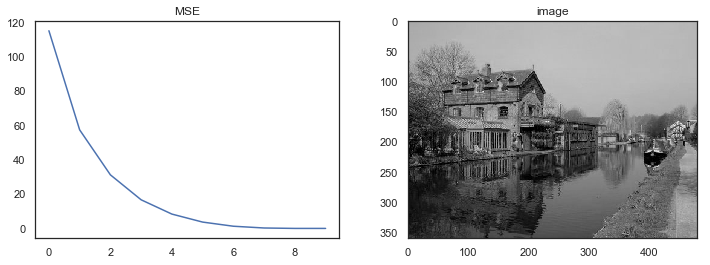

image shape:  (375, 500)
MSE 10% components 37:  110.70610966659208
MSE 20% components 75:  35.05042747835617
MSE 30% components 112:  9.950845642505795
MSE 40% components 150:  2.17672830375262
MSE 50% components 187:  0.42914981032006255
MSE 60% components 225:  0.10241522480734375
MSE 70% components 262:  0.03466171846376753
MSE 80% components 300:  0.01128439921832079
MSE 90% components 337:  0.0027984753826051072
MSE 100% components 375:  1.394189426435911e-25


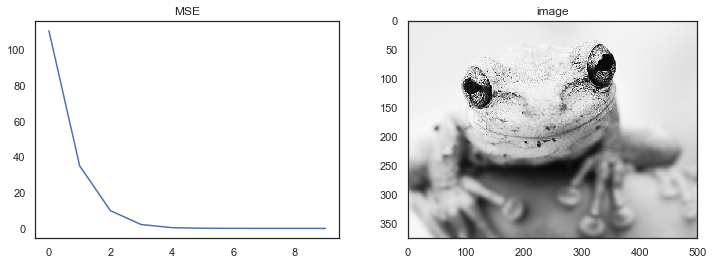

In [6]:
for image in images[:5]:
    image_errors = list()
    print('image shape: ', image.shape)
    
    for i in range(1, 10 + 1):
        comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
        res = pca_compres(image, components = comp_n )
        error = mean_squared_error(image, res)
        image_errors.append(error)
        print(f'MSE {i*10}% components {comp_n}: ', error) 
        
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title('MSE')
    plt.plot(image_errors)
    
    plt.subplot(122)
    plt.title('image')
    plt.imshow(image, cmap='gray')
    plt.show();

In [7]:
def total_mse(data):
    total_mse = np.zeros(10, )
    for image in data:
        
        sample_errors = list()
        
        for i in range(1, 10 + 1):
            comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
            res = pca_compres(image, components = comp_n )
            error = mean_squared_error(image, res)
            sample_errors.append(error)
            
        np.add(total_mse, np.array(sample_errors), out = total_mse)
    return total_mse / len(data)

225.6257841615274 110.50304134993686 59.912259667581374 32.42811231510316 17.187374142532025 8.551170218979882 3.8530333001276618 1.434028762658206 0.3544121011962721 4.943035974828739e-26


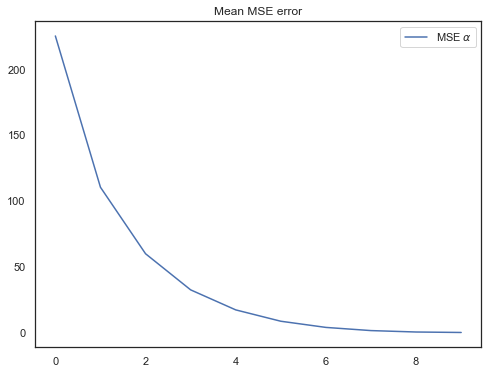

In [8]:
error = total_mse(images)
print(*error)
plt.figure(figsize=(8, 6))
plt.title('Mean MSE error')
plt.plot(error, label='MSE $\\alpha$')
plt.legend()
plt.show();

# Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку $𝑀_1$: 
### Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів: 

(500, 401)


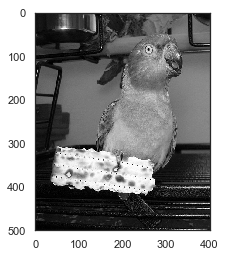

In [9]:
plt.imshow(images[0], cmap='gray') 
print(images[0].shape)

In [10]:
def normalize_matrix(matrix):
    row_sums = matrix.sum(axis = 1)
    res = matrix / row_sums[:, np.newaxis]
    return res

 - По горизонталі, зліва направо

In [11]:
def image_iteration_left_right(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i][j + 1]
            matrix[val_2][val_1] += 1
    return matrix

- По горизонталі, справа наліво

In [13]:
def image_iteration_right_left(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][w - j - 2]
            val_2 = image[i][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix    

- По вертикалі, зверху вниз

In [14]:
def image_iteration_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[i][j]
            val_2 = image[i + 1][j]
            matrix[val_2][val_1] += 1
    return matrix  

- По вертикалі, знизу вгору

In [15]:
def image_iteration_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[h - i - 2][j]
            val_2 = image[h - i - 1][j]
            matrix[val_1][val_2] += 1
    return matrix  

- По головній діагоналі, зверху вниз

In [16]:
def main_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i + 1][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

 - По головній діагоналі, знизу вгору

In [17]:
def main_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 2][w - j - 2]
            val_2 = image[h - i - 1][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix  

- По побічній діагоналі, зверху вниз

In [18]:
def opposite_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][w - j - 1]
            val_2 = image[i + 1][w - j - 2]
            matrix[val_2][val_1] += 1
    return matrix  

 - По побічній діагоналі, знизу вгору

In [19]:
def opposite_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 1][j]
            val_2 = image[h - i - 2][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [20]:
def general_stochastic_matrix(data, hmm_type = 'h_left_right'):
    stochastic_matrix = np.zeros((256, 256))
    if hmm_type == 'h_left_right':
        for image in data:
            image_iteration_left_right(image, stochastic_matrix)
                
    if hmm_type == 'h_right_left':
        for image in data:
            image_iteration_right_left(image, stochastic_matrix)
                
    if hmm_type == 'v_top_down':
        for image in data:
            image_iteration_top_down(image, stochastic_matrix)
                
    if hmm_type == 'v_down_up':
        for image in data:
            image_iteration_down_up(image, stochastic_matrix)
                
    if hmm_type == 'dm_top_down':
        for image in data:
            main_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'dm_down_up':
        for image in data:
            main_diagonal_down_up(image, stochastic_matrix)
                
    if hmm_type == 'ds_top_down':
        for image in data:
            opposite_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'ds_down_up':
        for image in data:
            opposite_diagonal_down_up(image, stochastic_matrix)
            
    stochastic_matrix = normalize_matrix(stochastic_matrix)
    return stochastic_matrix

In [21]:
def regularity_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    return not ((new_matrix <= 0).sum() != 0)

In [22]:
def recurrence_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    for i in range(new_matrix.shape[0]):
        if new_matrix[~i, i] == 0:
            return False
        return True

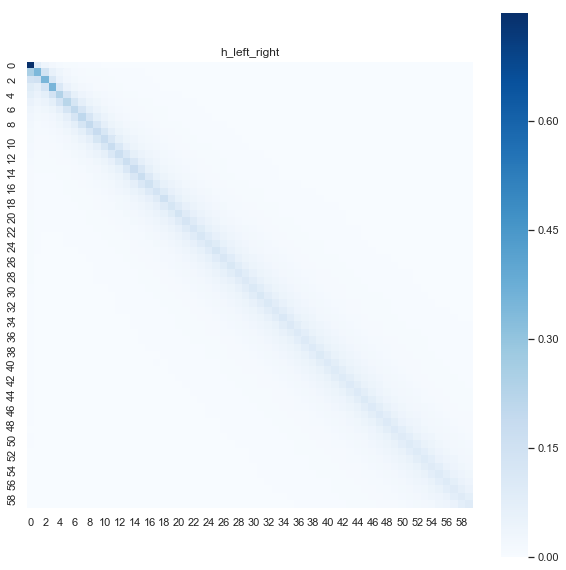

Matrix is regular:  True
Marix is recurrent:  True


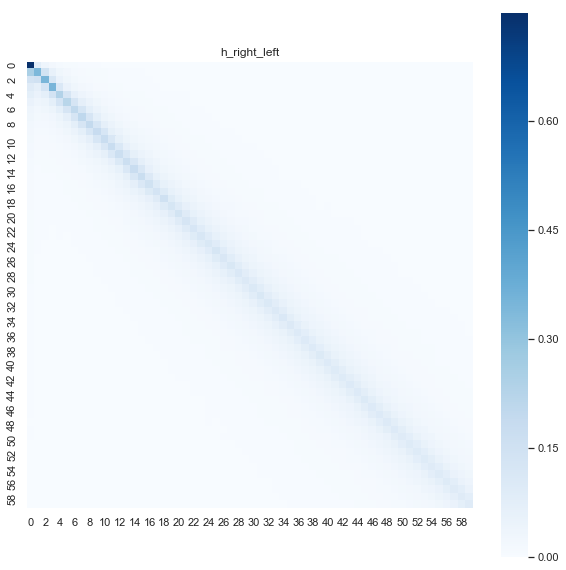

Matrix is regular:  True
Marix is recurrent:  True


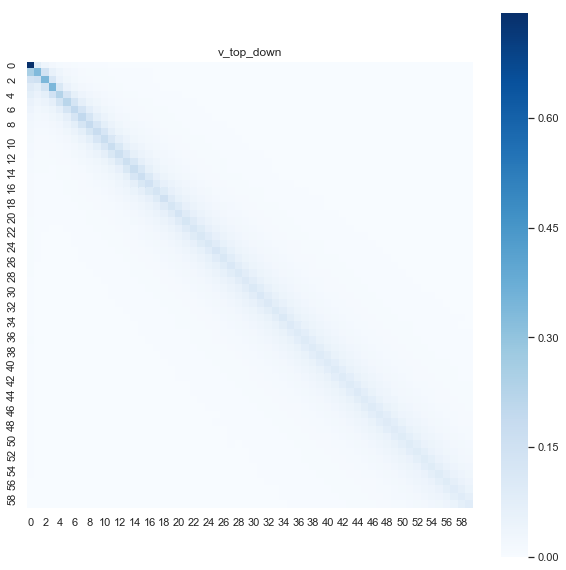

Matrix is regular:  True
Marix is recurrent:  True


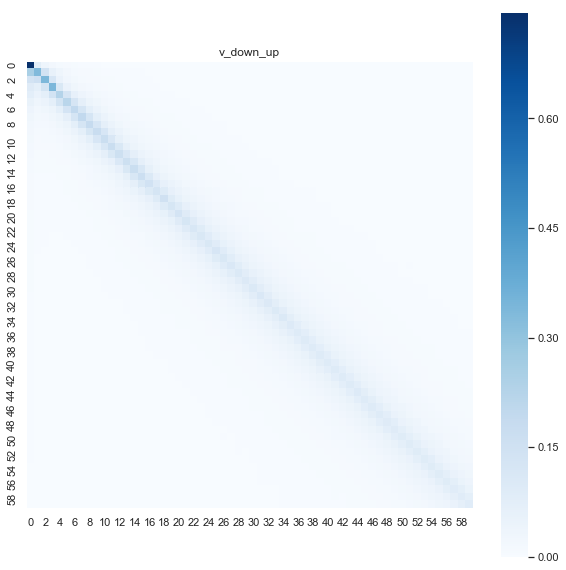

Matrix is regular:  True
Marix is recurrent:  True


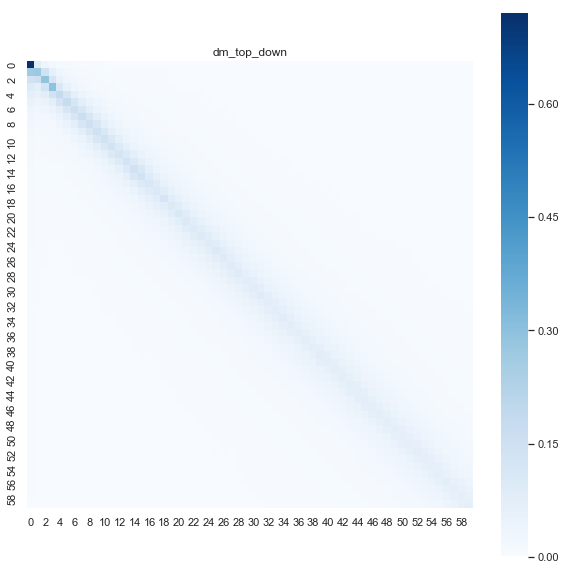

Matrix is regular:  True
Marix is recurrent:  True


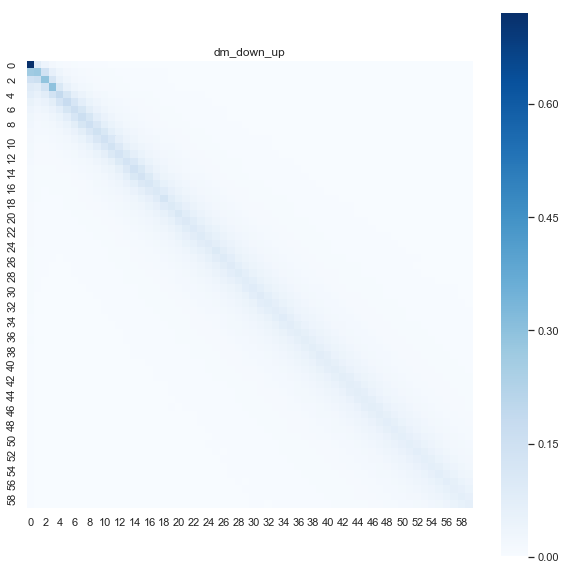

Matrix is regular:  True
Marix is recurrent:  True


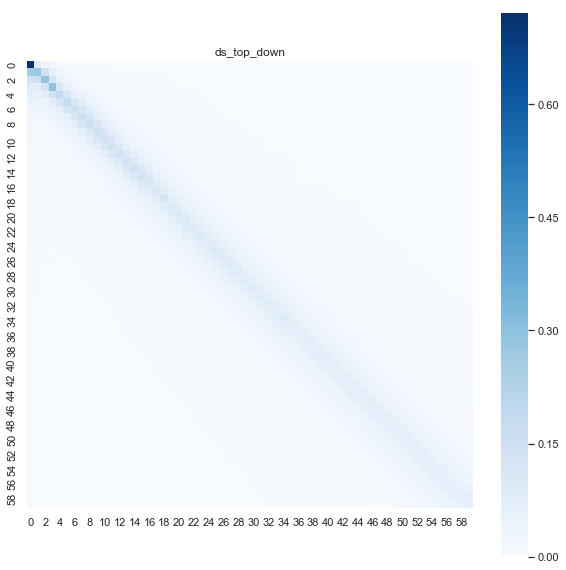

Matrix is regular:  True
Marix is recurrent:  True


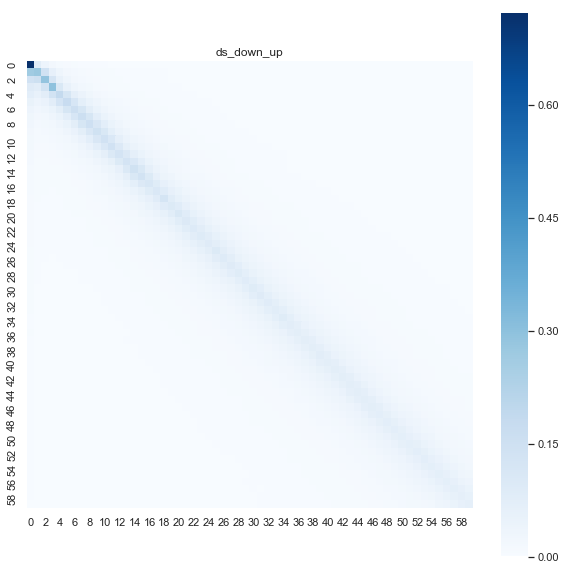

Matrix is regular:  True
Marix is recurrent:  True


In [23]:
hmm_types = ['h_left_right', 'h_right_left', 'v_top_down', 'v_down_up', 'dm_top_down', 'dm_down_up', 'ds_top_down', 'ds_down_up']

for i, type_ in enumerate(hmm_types):
    matrix = general_stochastic_matrix(images, hmm_type=type_)
    plt.figure(figsize=(10, 10))
    plt.title(type_)
    sns.heatmap(matrix[:6 * 10, :6 * 10], square=True, cmap='Blues')
    plt.show();
    
    regular = regularity_check(matrix, k = 5)
    print('Matrix is regular: ', regular)
    recurrent = recurrence_check(matrix, k = 5)
    print('Marix is recurrent: ', recurrent)